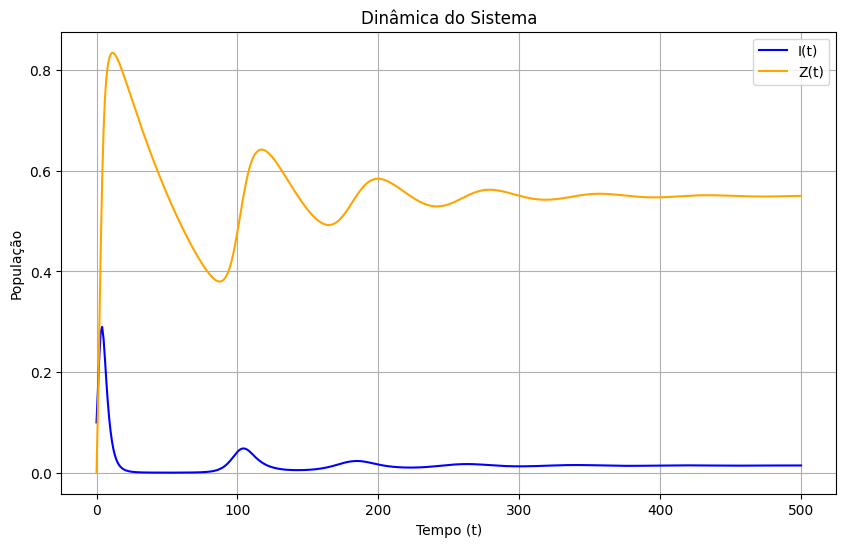

In [41]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parâmetros
# Definição do sistema de EDOs
def system(t, y,beta,gamma,delta,P):
    I, Z = y
    dIdt = beta * (P - Z) * I - gamma * I
    dZdt = beta * (P - Z) * I - delta * (Z - I)
    return [dIdt, dZdt]

# Condições iniciais
t0 = 0      # Tempo inicial
tf = 500    # Tempo final
I0 = 0.1      # Condição inicial para I
Z0 = 0      # Condição inicial para Z

# Resolvendo o sistema de EDOs
time_span = (t0, tf)
y0 = [I0, Z0]

beta = 1   # Taxa de transmissão
P = 1   # População total
gamma = 0.45 # Taxa de recuperação
delta = 0.012 # Taxa de transição Z -> I

sistema = lambda t, y: system(t, y,beta,gamma,delta,P)
sol = solve_ivp(sistema, time_span, y0, t_eval=np.linspace(t0, tf, 500))

# Extraindo os resultados
t = sol.t
I = sol.y[0]
Z = sol.y[1]

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.plot(t, I, label='I(t)', color='blue')
plt.plot(t, Z, label='Z(t)', color='orange')
plt.title('Dinâmica do Sistema')
plt.xlabel('Tempo (t)')
plt.ylabel('População')
plt.legend()
plt.grid()
plt.show()


In [42]:
import sympy as sp

# Definir variáveis simbólicas
I, Z = sp.symbols('I Z', real=True, nonnegative=True)
beta, P, gamma, delta = sp.symbols('beta P gamma delta', positive=True)

# Definir o sistema de equações diferenciais
dI_dt = beta * (P - Z) * I - gamma * I
dZ_dt = beta * (P - Z) * I - delta * (Z - I)

# Resolver o sistema para dI/dt = 0 e dZ/dt = 0
equilibrio = sp.solve([dI_dt, dZ_dt], (I, Z), dict=True)

# Exibir os pontos de equilíbrio
for i, ponto in enumerate(equilibrio, 1):
    print(f"Ponto de Equilíbrio {i}:")
    for var, val in ponto.items():
        print(f"  {var} = {sp.simplify(val)}")
    print()


Ponto de Equilíbrio 1:
  I = 0
  Z = 0

Ponto de Equilíbrio 2:
  I = delta*(P*beta - gamma)/(beta*(delta + gamma))
  Z = P - gamma/beta



In [48]:
vars_ = [I, Z]  # Variáveis do sistema
jacobian = sp.Matrix([dI_dt, dZ_dt]).jacobian(vars_)
jac_eval = jacobian.subs(equilibrio[1])

In [51]:
eigenvalues = jac_eval.eigenvals()
sp.simplify(eigenvalues)

{-sqrt(delta)*sqrt(P**2*beta**2*delta - 2*P*beta*delta**2 - 8*P*beta*delta*gamma - 4*P*beta*gamma**2 + delta**3 + 4*delta**2*gamma + 8*delta*gamma**2 + 4*gamma**3)/(2*(delta + gamma)) - delta*(P*beta + delta)/(2*(delta + gamma)): 1, sqrt(delta)*sqrt(P**2*beta**2*delta - 2*P*beta*delta**2 - 8*P*beta*delta*gamma - 4*P*beta*gamma**2 + delta**3 + 4*delta**2*gamma + 8*delta*gamma**2 + 4*gamma**3)/(2*(delta + gamma)) - delta*(P*beta + delta)/(2*(delta + gamma)): 1}

In [53]:
for i, ponto in enumerate(equilibrio, 1):
    print(f"\nPonto de Equilíbrio {i}:")
    for var, val in ponto.items():
        print(f"  {var} = {sp.simplify(val)}")
    
    # Substituir o ponto de equilíbrio no Jacobiano
    jac_eval = jacobian.subs(ponto)
    
    print("\nJacobian no ponto de equilíbrio:")
    sp.pprint(jac_eval)
    
    # Calcular os autovalores
    eigenvalues = jac_eval.eigenvals()
    print("\nAutovalores:")
    for eigen, multiplicidade in eigenvalues.items():
        print(f"  {sp.simplify(eigen)} (multiplicidade: {multiplicidade})")
    
    # # Verificar a estabilidade
    # stable = all(sp.re(eigen) < 0 for eigen in eigenvalues)
    # if stable:
    #     print("O ponto de equilíbrio é localmente estável.")
    # else:
    #     print("O ponto de equilíbrio é localmente instável.")


Ponto de Equilíbrio 1:
  I = 0
  Z = 0

Jacobian no ponto de equilíbrio:
⎡P⋅β - γ  0 ⎤
⎢           ⎥
⎣P⋅β + δ  -δ⎦

Autovalores:
  P*beta - gamma (multiplicidade: 1)
  -delta (multiplicidade: 1)

Ponto de Equilíbrio 2:
  I = delta*(P*beta - gamma)/(beta*(delta + gamma))
  Z = P - gamma/beta

Jacobian no ponto de equilíbrio:
⎡  ⎛    P⋅β - γ⎞       -δ⋅(P⋅β - γ)   ⎤
⎢β⋅⎜P - ───────⎟ - γ   ─────────────  ⎥
⎢  ⎝       β   ⎠           δ + γ      ⎥
⎢                                     ⎥
⎢  ⎛    P⋅β - γ⎞           δ⋅(P⋅β - γ)⎥
⎢β⋅⎜P - ───────⎟ + δ  -δ - ───────────⎥
⎣  ⎝       β   ⎠              δ + γ   ⎦

Autovalores:
  (-sqrt(delta)*sqrt(P**2*beta**2*delta - 2*P*beta*delta**2 - 8*P*beta*delta*gamma - 4*P*beta*gamma**2 + delta**3 + 4*delta**2*gamma + 8*delta*gamma**2 + 4*gamma**3) - delta*(P*beta + delta))/(2*(delta + gamma)) (multiplicidade: 1)
  (sqrt(delta)*sqrt(P**2*beta**2*delta - 2*P*beta*delta**2 - 8*P*beta*delta*gamma - 4*P*beta*gamma**2 + delta**3 + 4*delta**2*gamma + 8*delta*gamma

In [63]:
eigenvalues = [sp.simplify(eigen).subs({beta:1,gamma:0.45,delta:0.012,P:1}) for eigen in jac_eval.eigenvals()]

In [66]:
sp.simplify(eigen)

(sqrt(delta)*sqrt(P**2*beta**2*delta - 2*P*beta*delta**2 - 8*P*beta*delta*gamma - 4*P*beta*gamma**2 + delta**3 + 4*delta**2*gamma + 8*delta*gamma**2 + 4*gamma**3) - delta*(P*beta + delta))/(2*(delta + gamma))

In [65]:
sp.N(eigenvalues[0])

-0.0131428571428571 - 0.0801702270554503*I